In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.atr_rsi_strategy import (
    AtrRsiStrategy,
)
from vnpy.app.cta_strategy.strategies.turtle_signal_strategy import TurtleSignalStrategy
from datetime import datetime

In [2]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BTCUSD.BITFINEX",
    interval="1m",
    start=datetime(2017, 9, 1),
    end=datetime(2019, 9, 1),
    rate=0.3/1000,
    slippage=0.02,
    size=100,
    pricetick=0.001,
    capital=1_000_000,
)
engine.add_strategy(TurtleSignalStrategy, {})

2019-10-28 09:36:05.628430	开始加载历史数据
2019-10-28 09:36:10.673978	加载进度： [4%]
2019-10-28 09:36:15.518480	加载进度： [8%]
2019-10-28 09:36:20.865449	加载进度：# [12%]
2019-10-28 09:36:25.992796	加载进度：# [16%]
2019-10-28 09:36:31.229206	加载进度：## [21%]
2019-10-28 09:36:36.794205	加载进度：## [25%]
2019-10-28 09:36:42.082074	加载进度：## [29%]
2019-10-28 09:36:46.771040	加载进度：### [33%]
2019-10-28 09:36:52.246070	加载进度：### [37%]
2019-10-28 09:36:57.217240	加载进度：#### [41%]
2019-10-28 09:37:01.698840	加载进度：#### [45%]
2019-10-28 09:37:06.220299	加载进度：#### [49%]
2019-10-28 09:37:11.115390	加载进度：##### [53%]
2019-10-28 09:37:15.855394	加载进度：##### [58%]
2019-10-28 09:37:20.950478	加载进度：###### [62%]
2019-10-28 09:37:26.057582	加载进度：###### [66%]
2019-10-28 09:37:30.692154	加载进度：###### [70%]
2019-10-28 09:37:35.530402	加载进度：####### [74%]
2019-10-28 09:37:40.849261	加载进度：####### [78%]
2019-10-28 09:37:46.280297	加载进度：######## [82%]
2019-10-28 09:37:50.860327	加载进度：######## [86%]
2019-10-28 09:37:56.100557	加载进度：######### [90%]
2019-10-28 09:3

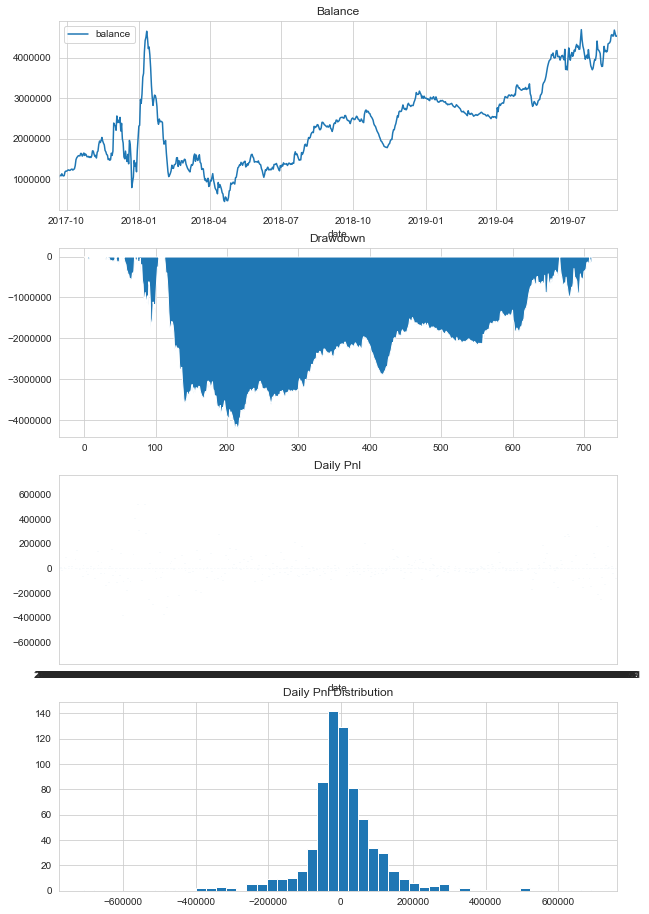

In [3]:
#%%`
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [4]:
setting = OptimizationSetting()
setting.set_target("Sharpe Ratio")
setting.add_parameter("entry_window", 5, 50, 5)
setting.add_parameter("exit_window", 10, 100, 5)
setting.add_parameter("atr_window",10, 100, 5)

engine.run_ga_optimization(setting)

2019-10-28 10:45:33.546017	参数优化空间：3610
2019-10-28 10:45:33.546017	每代族群总数：100
2019-10-28 10:45:33.546017	优良筛选个数：80
2019-10-28 10:45:33.546017	迭代次数：30
2019-10-28 10:45:33.546017	交叉概率：95%
2019-10-28 10:45:33.547018	突变概率：5%
2019-10-28 10:45:33.550022	开始加载历史数据
2019-10-28 10:45:33.596022	加载进度： [4%]
2019-10-28 10:45:33.614988	加载进度： [8%]
2019-10-28 10:45:33.638019	加载进度：# [12%]
2019-10-28 10:45:33.663986	加载进度：# [16%]
2019-10-28 10:45:33.688024	加载进度：## [21%]
2019-10-28 10:45:33.712986	加载进度：## [25%]
2019-10-28 10:45:33.739027	加载进度：## [29%]
2019-10-28 10:45:33.765986	加载进度：### [33%]
2019-10-28 10:45:33.792015	加载进度：### [37%]
2019-10-28 10:45:33.828007	加载进度：#### [41%]
2019-10-28 10:45:33.856986	加载进度：#### [45%]
2019-10-28 10:45:33.877987	加载进度：#### [49%]
2019-10-28 10:45:33.885986	加载进度：##### [53%]
2019-10-28 10:45:33.896003	加载进度：##### [58%]
2019-10-28 10:45:33.900986	加载进度：###### [62%]
2019-10-28 10:45:33.908987	加载进度：###### [66%]
2019-10-28 10:45:33.912985	加载进度：###### [70%]
2019-10-28 10:45:33.916989	加载

c:\vnstudio207\lib\site-packages\vnpy\app\cta_strategy\backtesting.py:373: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


KeyError: 'Sharpe Ratio'